In [27]:
#importar Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#Formatar decimais
pd.options.display.float_format='{:20,.2f}'.format

In [3]:
#Carregar Arquivo
#Permite Escolher O Arquivo quando executa a celula

from google.colab import files
arq=files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [4]:
#Criar DataFrame

df=pd.read_excel("AdventureWorks.xlsx")

In [5]:
# Visualiar as primeiras Linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# Visualiar Quantidade de Linhas
df.shape

(904, 16)

In [7]:
# Visualiar datatypes
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
#Receita Total
df['Valor Venda'].sum()

5984606.1426

In [9]:
#Criar Coluna Custo
df['Custo']=df['Custo Unitário'].mul(df['Quantidade'])

In [10]:
#Verificar nova coluna
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [11]:
#Calcular Custo Total
round(df['Custo'].sum(),2)

2486783.05

In [12]:
#Criar Coluna Lucro

df['Lucro']=df['Valor Venda']-df['Custo']

In [13]:
#Calcular Lucro Total
round(df['Lucro'].sum(),2)

3497823.09

In [16]:
#Coluna Tempo de Envio
df['Tempo_Evnio']=(df['Data Envio']-df['Data Venda'])
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Evnio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7 days


In [17]:
#Extraindo apenas os dias
df['Tempo_Evnio']=(df['Data Envio']-df['Data Venda']).dt.days

In [18]:
df['Tempo_Evnio'].dtypes

dtype('int64')

In [23]:
#Media de Tempo de Envio Por Marca
df.groupby('Marca')['Tempo_Evnio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Evnio, dtype: float64

In [24]:
# Verificar Valores Nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Evnio       0
dtype: int64

In [28]:
#Agrupar Lucro Por Ano e Por Marca

df.groupby([df['Data Venda'].dt.year,'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [30]:
#Reset Index

lucro_ano=df.groupby([df['Data Venda'].dt.year,'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [32]:
#Quantidade de Produtos Vendidos

df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

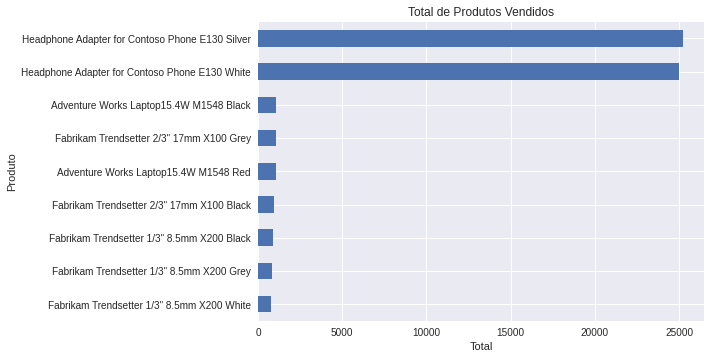

In [34]:
#Grafico Quantidade de Produtos Vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel('Total')
plt.ylabel('Produto');

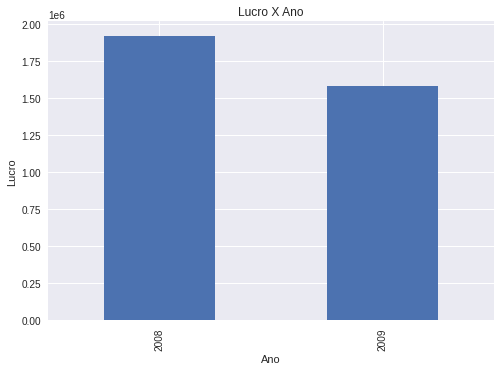

In [35]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro X Ano')
plt.xlabel('Ano')
plt.ylabel('Lucro');

In [36]:
#Filtrando pro Ano 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

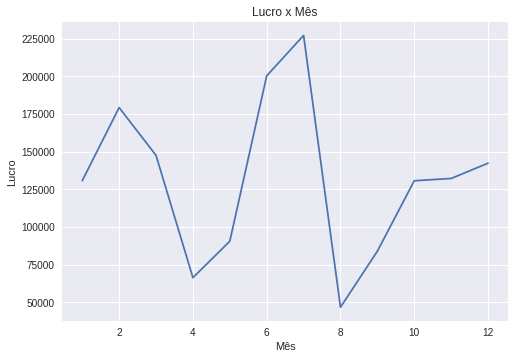

In [38]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

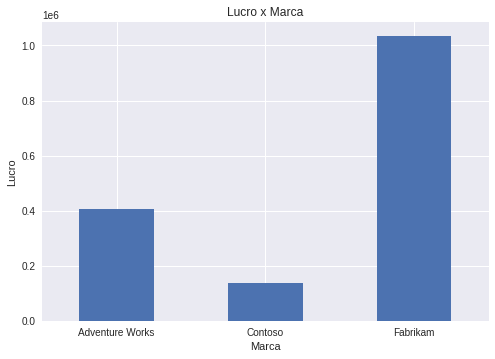

In [39]:
#Lucro Por Marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

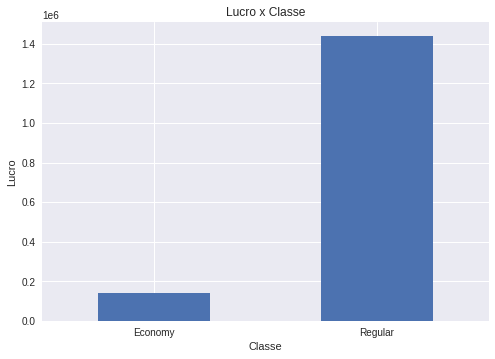

In [40]:
#Lucro Por Classe
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal')

In [41]:
df['Tempo_Evnio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Evnio, dtype: float64

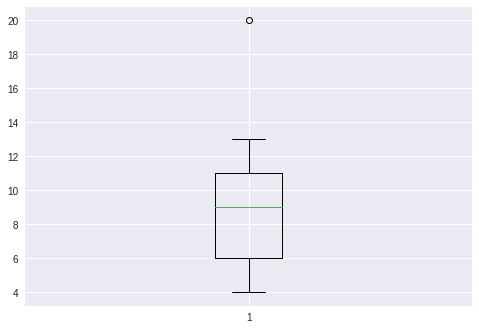

In [42]:
#Gafrico de Boxplot
plt.boxplot(df["Tempo_Evnio"]);

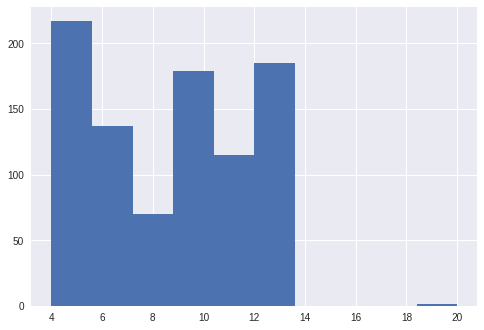

In [43]:
#Histograma"
plt.hist(df["Tempo_Evnio"]);

In [44]:
#Tempo mínimo de envio
df["Tempo_Evnio"].min()

4

In [45]:
#Tempo Maximo de envio
df["Tempo_Evnio"].max()

20

In [49]:
#Identificando o Outlier
df[df["Tempo_Evnio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Evnio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
